In [1]:
from keras.datasets import fashion_mnist
(train_x, train_y), (test_x, text_y) = fashion_mnist.load_data()

Using TensorFlow backend.
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
test_y=text_y

In [3]:
print("Training data size", train_x.shape, train_y.shape)
print("Test data size", test_x.shape, test_y.shape)

Training data size (60000, 28, 28) (60000,)
Test data size (10000, 28, 28) (10000,)


In [4]:
#Find unique numbers from train lables
classes = np.unique(train_y)
nclasses=len(classes)
print('Total number of outputs: ', nclasses)
print('Output classes', classes)

Total number of outputs:  10
Output classes [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth :9')

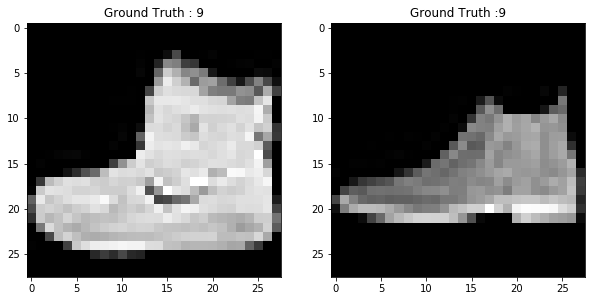

In [5]:
plt.figure(figsize=[10,10])
#display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_y[0]))

#Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='gray')
plt.title("Ground Truth :{}".format(test_y[0]))



# Preprocessing data

In [6]:
#convert each 28*28 image of the data to a 3 D matrix of size 28*28*1 before feeding into network
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)
train_x.shape, train_x.shape


((60000, 28, 28, 1), (60000, 28, 28, 1))

In [7]:
#data is in int 8 format, so change it to float32 before feeding into the network
#rescale the pixel values (in range 0 to 1)
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x/255.
test_x = test_x/255.

In [8]:
#convert class labels into one hot encoding vectors
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

print( "Orignal label {}".format(train_y[0]) )
print("modified label {}".format(train_y_one_hot[0]))

Orignal label 9
modified label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_label, valid_label = train_test_split(train_x, train_y_one_hot, test_size=0.2, random_state=13)

train_x.shape, valid_x.shape, train_label.shape ,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# The Network

##### Architecture of Model
###### Using three convolution layer
###### The first layer will have 32 - 3*3 filters
###### The second layer will have 64 - 3*3 filters
###### The third layer will have 128 - 3*3 filters
###### In addition , there are three maxpooling layers of 2*2


In [10]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28,28,1), padding = 'same' ))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Conv2D (64, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Conv2D(128, kernel_size = (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dense(num_classes, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


###### Compile using Adam optimizer

In [13]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [14]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [15]:
# Training model using keras.fit() function. Model will train for 20 epochs.
# .fit() function will return a history object which can be used later to polt accuracy and loss function

fashion_train = fashion_model.fit(train_x, train_label, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(valid_x, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 83s 2ms/step - loss: 0.4637 - acc: 0.8314 - val_loss: 0.3384 - val_acc: 0.8799
Epoch 2/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2910 - acc: 0.8927 - val_loss: 0.2982 - val_acc: 0.8891
Epoch 3/20
48000/48000 [==============================] - 74s 2ms/step - loss: 0.2429 - acc: 0.9110 - val_loss: 0.2518 - val_acc: 0.9079
Epoch 4/20
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2102 - acc: 0.9227 - val_loss: 0.2465 - val_acc: 0.9123
Epoch 5/20
48000/48000 [==============================] - 105s 2ms/step - loss: 0.1843 - acc: 0.9317 - val_loss: 0.2427 - val_acc: 0.9137
Epoch 6/20
48000/48000 [==============================] - 92s 2ms/step - loss: 0.1628 - acc: 0.9396 - val_loss: 0.2248 - val_acc: 0.9214
Epoch 7/20
48000/48000 [==============================] - 96s 2ms/step - loss: 

In [29]:
# save this model
fashion_model.save("fashion_cnn_model.h5py")

In [16]:
test_eval = fashion_model.evaluate(test_x, test_y_one_hot, verbose=0)
print("Test loss: {}".format(test_eval[0]))
print("Test Accuracy: {}".format(test_eval[1]))

Test loss: 0.4546848324853927
Test Accuracy: 0.9189


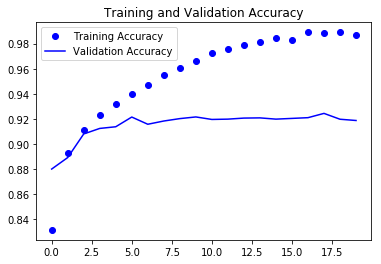

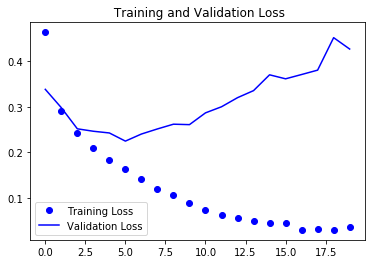

In [23]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title(' Training and Validation Loss')
plt.legend()
plt.show()

#### Adding DropOut in the Network

In [26]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same', input_shape = (28,28,1)))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation = 'softmax'))

fashion_model.summary()

UnboundLocalError: local variable 'a' referenced before assignment

In [28]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_drop_model = Sequential()
fashion_drop_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_drop_model.add(LeakyReLU(alpha=0.1))
fashion_drop_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_drop_model.add(Dropout(0.25))
fashion_drop_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_drop_model.add(LeakyReLU(alpha=0.1))
fashion_drop_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_drop_model.add(Dropout(0.25))
fashion_drop_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_drop_model.add(LeakyReLU(alpha=0.1))                  
fashion_drop_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_drop_model.add(Dropout(0.4))
fashion_drop_model.add(Flatten())
fashion_drop_model.add(Dense(128, activation='linear'))
fashion_drop_model.add(LeakyReLU(alpha=0.1))           
fashion_drop_model.add(Dropout(0.3))
fashion_drop_model.add(Dense(num_classes, activation='softmax'))

fashion_drop_model.summary()

UnboundLocalError: local variable 'a' referenced before assignment